In [1]:
import warnings; warnings.filterwarnings('ignore')

import numpy as np
from numpy.linalg import inv
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="darkgrid")

from sklearn.preprocessing import StandardScaler

In [2]:
# load data
data=pd.read_csv('machine-learning-ex1/ex1/ex1data2.txt',header=None,names=['size_sqrt','bedroom_num','price'])

display(data.head())
data.shape

,size_sqrt,bedroom_num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


(47, 3)

In [3]:
# split dataframe into X vs. y and convert them into numpy arrays for vectorized operations
y=data.filter(['price'],axis=1).values
X=data.drop(['price'],axis=1).values

print(y[:5,])
print(X[:5,])

[[399900]
 [329900]
 [369000]
 [232000]
 [539900]]
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]


In [4]:
# approach 1: feature normalization using sklearn API
ss=StandardScaler()
X_scaled=ss.fit_transform(X)

print('Sample scaled data:')
print(X_scaled[:5])
print('\nMean vector: {}'.format(ss.mean_))
print('Std vector: {}'.format(np.sqrt(ss.var_)))

Sample scaled data:
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]

Mean vector: [ 2000.68085106     3.17021277]
Std vector: [  7.86202619e+02   7.52842809e-01]


In [5]:
# approach 2: ground-up feature normalization
means=np.mean(X,axis=0)
stds=np.std(X,axis=0)
for col in range(X.shape[1]):
    X_scaled[:,col]=(X[:,col]-means[col])/stds[col]

print('Sample scaled data:')
print(X_scaled[:5])
print('\nMean vector: {}'.format(means))
print('Std vector: {}'.format(stds))

Sample scaled data:
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]

Mean vector: [ 2000.68085106     3.17021277]
Std vector: [  7.86202619e+02   7.52842809e-01]


In [6]:
# construct cost function, gradient and gradient descent
def cost_ftn(theta,X,y):
    sample_size=X.shape[0]
    delta=np.dot(X,theta)-y
    cost=np.dot(delta.T,delta)/(2*sample_size)
    return cost.ravel()

def gradient(theta,X,y):
    sample_size=X.shape[0]
    delta=np.dot(X,theta)-y
    gradient=np.dot(X.T,delta)/sample_size
    return gradient

def gradient_descent(theta,X,y,learning_rate,num_iter):
    cost=[]
    for i in range(num_iter):
        theta=theta-learning_rate*gradient(theta,X,y)
        cost.append(cost_ftn(theta,X,y))
    return theta,cost

In [7]:
# derive theta with gradient descent
bias=np.ones((X_scaled.shape[0],1))
X_bias=np.concatenate((bias,X_scaled),axis=1)
theta_initial=np.zeros((X_bias.shape[1],1)) 
num_iter=400
learning_rate=0.03
theta,cost_list=gradient_descent(theta_initial,X_bias,y,learning_rate,num_iter)

print("Theta found by gradient descent:")
print(np.round(theta,4))

Theta found by gradient descent:
[[ 340410.919 ]
 [ 109162.6885]
 [  -6293.2474]]


In [8]:
# prediction with theta found by gradient descent
x_scaled=ss.transform(np.array([1650,3]).reshape(1,2)) # normalize test data with means/stds found in training
x_scaled=np.insert(x_scaled,0,1,axis=1)
predicted=np.dot(x_scaled,theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:,}'
      .format(round(np.asscalar(predicted))))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293,142


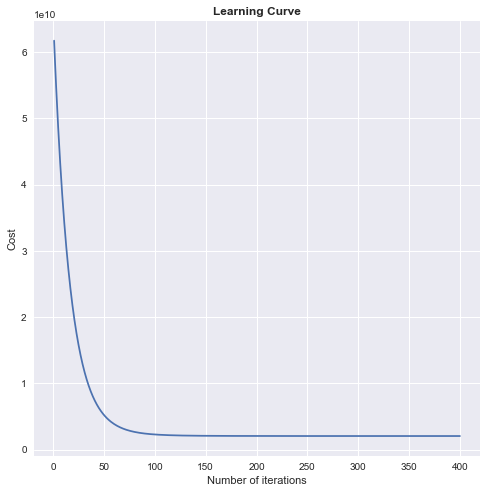

In [9]:
# plot learning curve to check gradient descent at different learning rates
x_range=np.linspace(1,len(cost_list),len(cost_list))

plt.figure(figsize=(8,8))
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Learning Curve',weight='bold')
plt.plot(x_range,cost_list);

In [10]:
# derive theta analytically
X_bias=np.insert(X,0,1,axis=1) # X not scaled for this approach
theta_linalg=np.dot(np.dot(inv(np.dot(X_bias.T,X_bias)),X_bias.T),y) 

print("Theta found by normal equation:")
print(theta_linalg)

Theta found by normal equation:
[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [11]:
# prediction with theta found analytically
x=[1,1650,3]
predicted=np.dot(x,theta_linalg)

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equation): ${:,}'
      .format(round(np.asscalar(predicted))))

Predicted price of a 1650 sq-ft, 3 br house (using normal equation): $293,081
